# Importing Libararies

In [64]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print("✅ Libraries imported successfully!")

import warnings
warnings.filterwarnings("ignore")

✅ Libraries imported successfully!


# Data Exploration

In [65]:
# Loading and reading the dataset
data = 'ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(data)

In [66]:
# Show the first 5 rows
df.head()

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
3    Male   27    1.80    87.0                             no   no   3.0  3.0   
4    Male   22    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [67]:
print("Column Names: ", df.columns)

Column Names:  Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [68]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(f"Numerical Columns: {numeric_cols}")
print(f"Categorical Columns: {categorical_cols}")

Numerical Columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [69]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 2111
Number of Columns: 17


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [71]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.315964     1.701620    86.586035     2.418986     2.685651   
std       6.357078     0.093368    26.191163     0.533996     0.778079   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      20.000000     1.630000    65.470000     2.000000     2.660000   
50%      23.000000     1.700000    83.000000     2.390000     3.000000   
75%      26.000000     1.770000   107.430000     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008053     1.010313     0.657861  
std       0.612950     0.850613     0.608926  
min       1.000000     0.000000     0.000000  
25%       1.585000     0.125000     0.000000  
50%       2.000000     1.000000     0.625000  
75%       2.480000     1.670000     1.000000  
max       3.000000     3.000000     2.000000

In [72]:
df.describe(include='O')

Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC  \
count    2111                           2111  2111       2111  2111  2111   
unique      2                              2     2          4     2     2   
top      Male                            yes   yes  Sometimes    no    no   
freq     1068                           1726  1866       1765  2067  2015   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351

In [73]:
for col in categorical_cols:
    print(df[col].value_counts())
    print('===========')

Gender
Male      1068
Female    1043
Name: count, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [74]:
d = df["NObeyesdad"].value_counts()
target = pd.DataFrame(d)
target

count
NObeyesdad                
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272

In [75]:
#colors = ['#FF9999','#66B3FF','#99FF99','#FFCC99','#C2C2F0','#FFB266']

sns.countplot(x='NObeyesdad', data=df, palette='Set2')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [76]:
import os
from ydata_profiling import ProfileReport

os.makedirs("reports", exist_ok=True)

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("reports/first-exploration.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:00<00:00, 746.29it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [77]:
profile.to_notebook_iframe()

In [78]:
# Check missing
df.isna().sum().sum()

0

In [79]:
# Check duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")
dup_per = (df.duplicated().sum()/len(df)) * 100
print(f"Percentage of duplicates: {dup_per:.2f}%")

Number of duplicates: 24
Percentage of duplicates: 1.14%


In [80]:
# Count of duplicates > 1% so it must be handled

In [81]:
df = df.drop_duplicates()

In [82]:
print(f"Number of duplicates: {df.duplicated().sum()}")
dup_per = (df.duplicated().sum()/len(df)) * 100
print(f"Percentage of duplicates: {dup_per:.2f}%")

Number of duplicates: 0
Percentage of duplicates: 0.00%


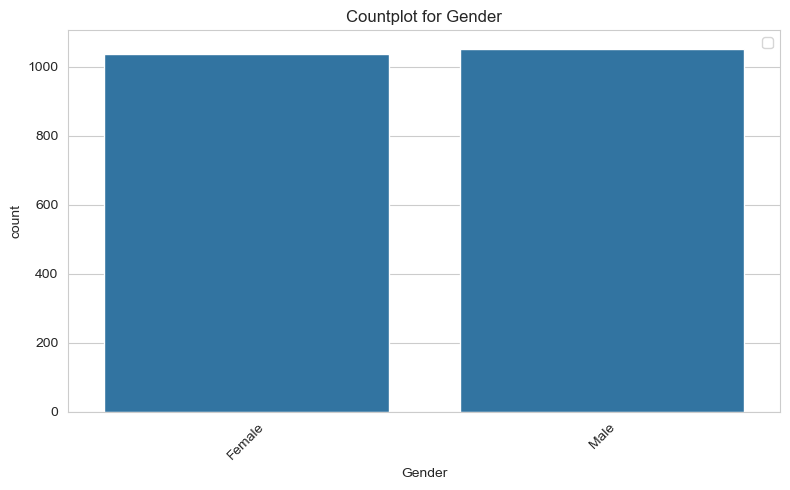

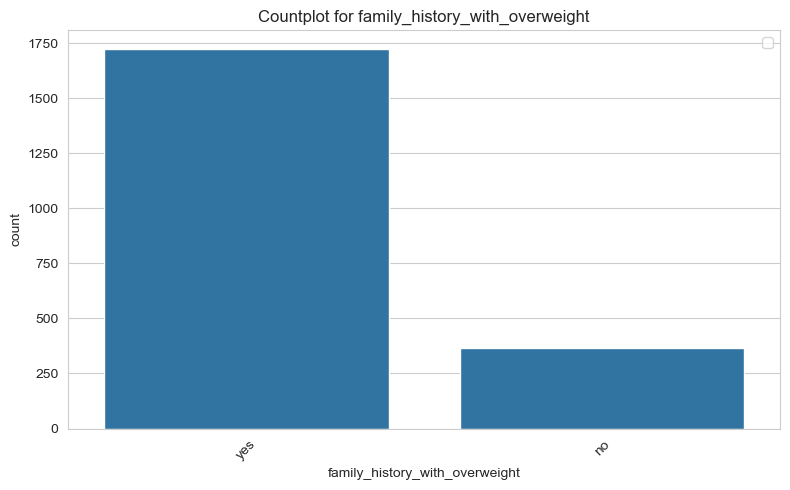

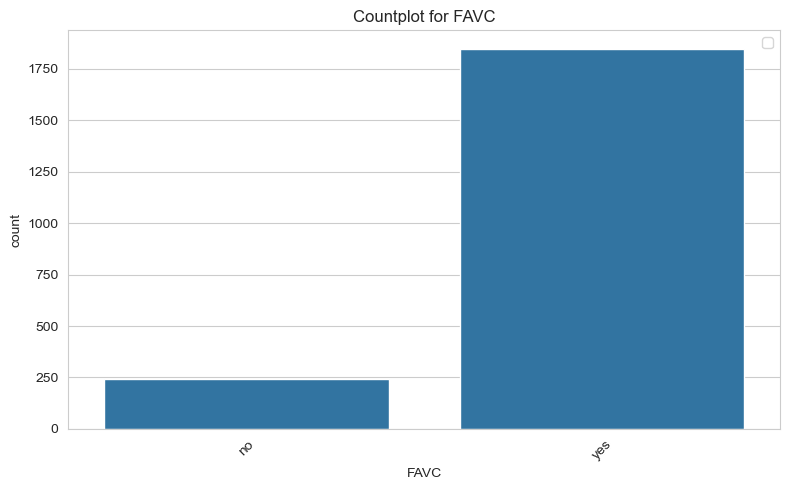

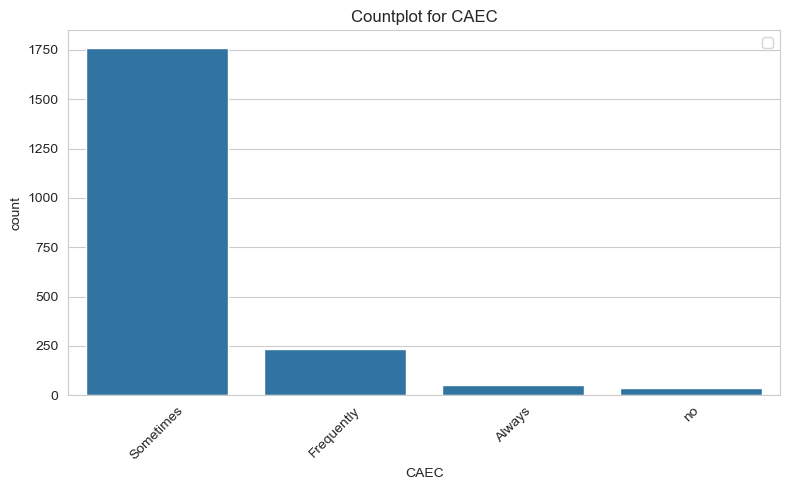

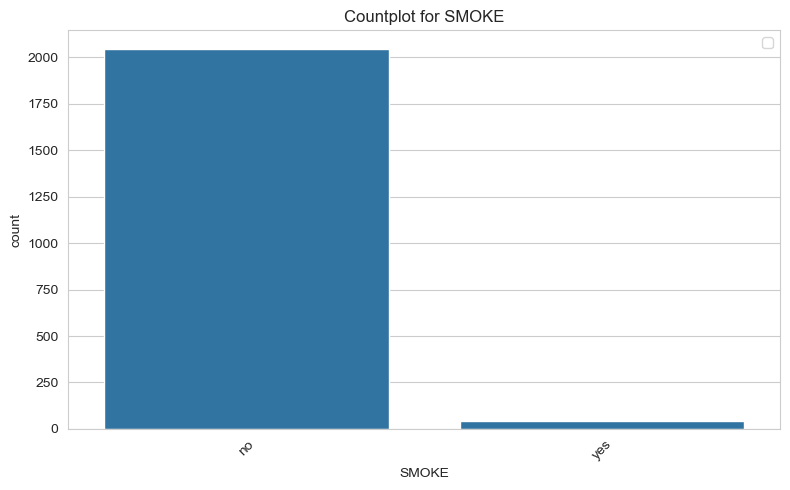

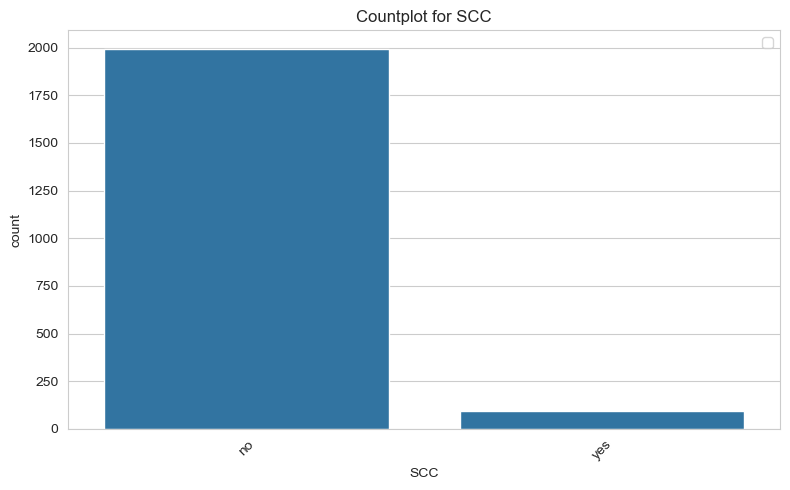

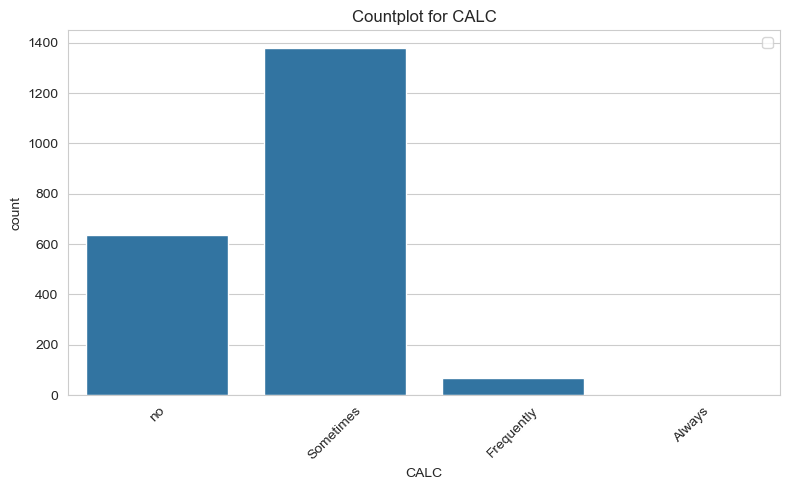

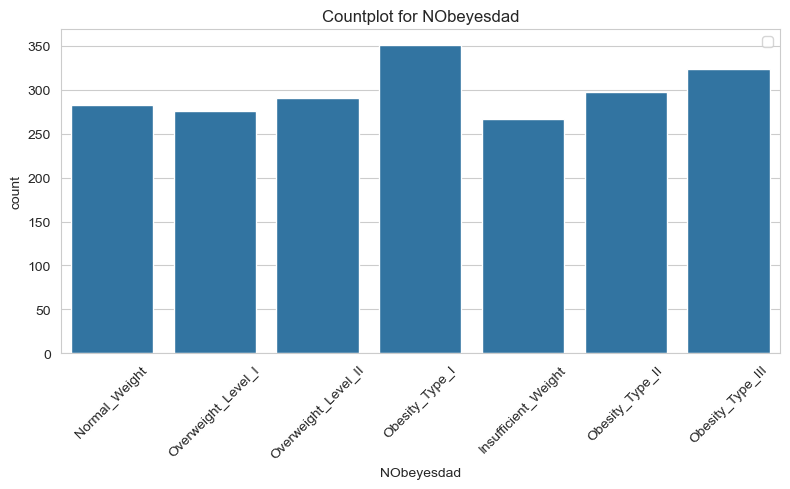

In [83]:
for col in categorical_cols:  
    plt.figure(figsize=(8,5))
    
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot for {col}") 
    plt.xticks(rotation=45)  
    plt.legend()
    plt.tight_layout()
    plt.show()

In [84]:
num_cols = df.select_dtypes(include=[np.number]).columns.to_list()

for col in num_cols:
    fig = px.histogram(df, x=col, marginal='box', title=f'Distribution of {col}', nbins=30)
    fig.show()

**Preprocessing Plan**
- Handling Outliers
  - Detect outliers using IQR or Z-score methods.
  - Decide on treatment: either removal or capping (Winsorization).
- Feature Scaling
  - Scale continuous features to standardize ranges.
  - Consider RobustScaler or MinMaxScaler.
- Handle Skewed Distributions
  - Apply log transforms to highly skewed features.
- Handle Ordinal Features
  - Encode ordinal features with integer mapping reflecting their order.
- Check Correlations
  - Compute correlation matrix.
  - If two features are highly correlated, consider removing or combining one.

# Preprocessing & Feature Engineering

In [85]:
# Categorizing the Age Feature into groups
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 30, 60, float('inf')],
                        labels=['Teen', 'Adult', 'Senior'], right=False)

# BMI from weight(kg) and height (m)^2 and then categorize it as (Underweight, Normal, Overweight, Obese)
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

df['BMI Group'] = pd.cut(df['BMI'], 
                         bins=[0, 18.5, 24.9, 29.9, float('inf')], 
                         labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

# Hydration_Status
df['Hydration_Status'] = df['CH2O'] / df['Weight']

In [86]:
df.head()

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62    64.0                            yes   no   2.0  3.0   
1  Female   21    1.52    56.0                            yes   no   3.0  3.0   
2    Male   23    1.80    77.0                            yes   no   2.0  3.0   
3    Male   27    1.80    87.0                             no   no   3.0  3.0   
4    Male   22    1.78    89.8                             no   no   2.0  1.0   

        CAEC SMOKE  ...  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no  ...   no  0.0  1.0          no  Public_Transportation   
1  Sometimes   yes  ...  yes  3.0  0.0   Sometimes  Public_Transportation   
2  Sometimes    no  ...   no  2.0  1.0  Frequently  Public_Transportation   
3  Sometimes    no  ...   no  2.0  0.0  Frequently                Walking   
4  Sometimes    no  ...   no  0.0  0.0   Sometimes  Public_Transportation   

            NObeyesdad AgeGroup            BMI  BMI Group Hydration_Status  
0        Normal_Weight     Teen  243865.264441      Obese         0.031250  
1        Normal_Weight     Teen  242382.271468      Obese         0.053571  
2        Normal_Weight     Teen  237654.320988      Obese         0.025974  
3   Overweight_Level_I     Teen  268518.518519      Obese         0.022989  
4  Overweight_Level_II     Teen  283423.810125      Obese         0.022272  

[5 rows x 21 columns]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2087 non-null   object  
 1   Age                             2087 non-null   int64   
 2   Height                          2087 non-null   float64 
 3   Weight                          2087 non-null   float64 
 4   family_history_with_overweight  2087 non-null   object  
 5   FAVC                            2087 non-null   object  
 6   FCVC                            2087 non-null   float64 
 7   NCP                             2087 non-null   float64 
 8   CAEC                            2087 non-null   object  
 9   SMOKE                           2087 non-null   object  
 10  CH2O                            2087 non-null   float64 
 11  SCC                             2087 non-null   object  
 12  FAF                      

- **Outlier Detection**

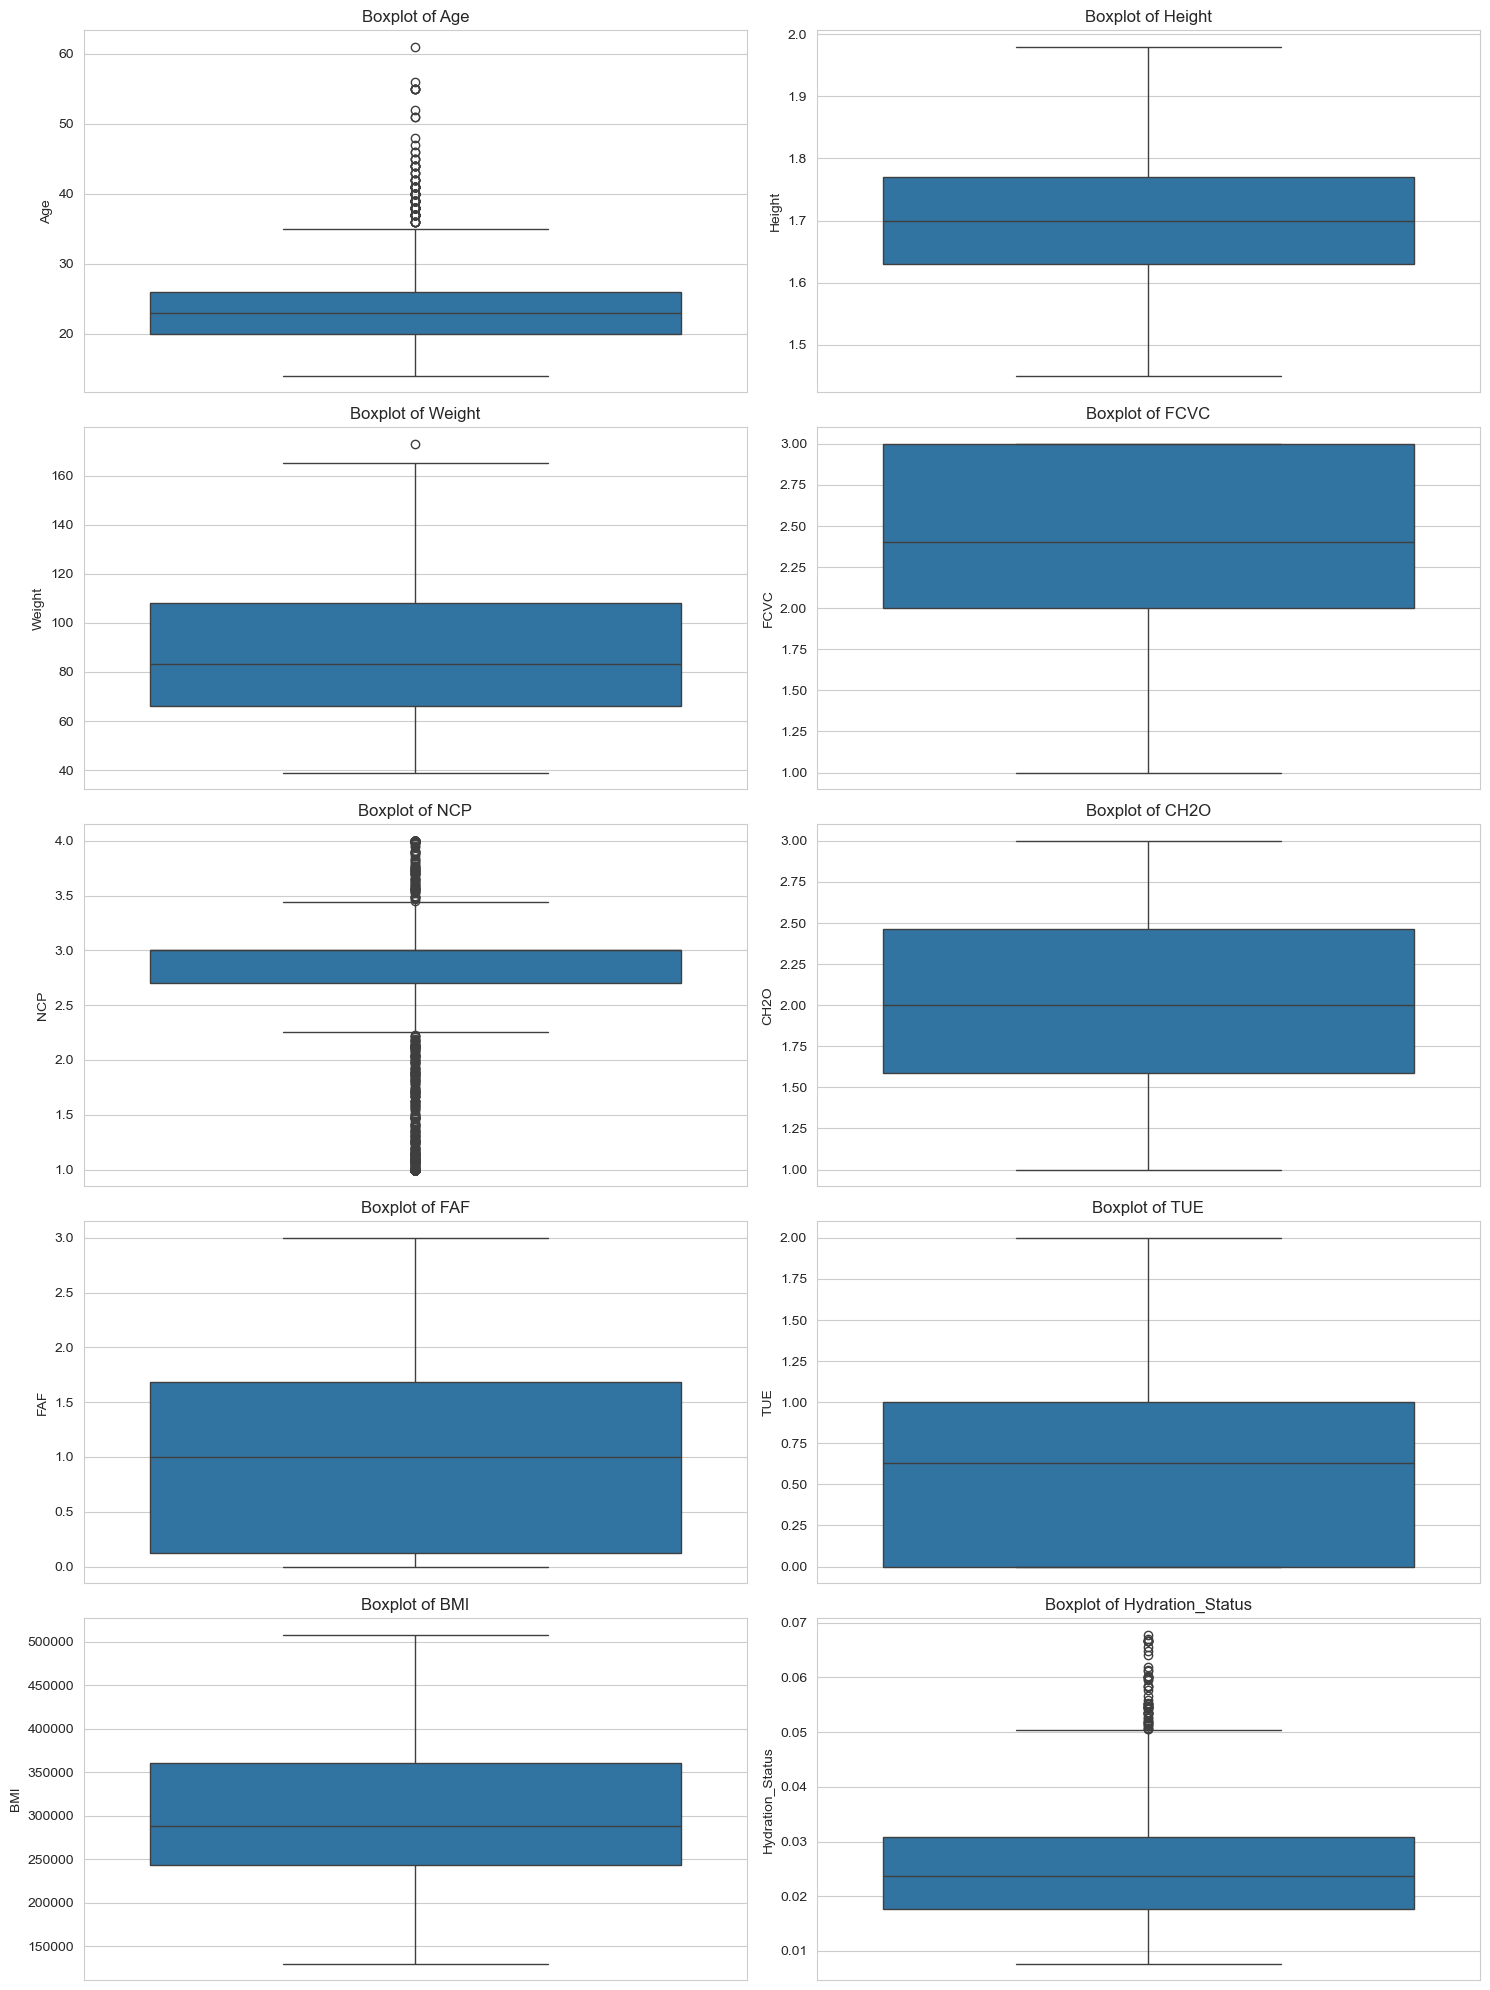

In [88]:
# Detect Outliers using boxplot
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
n_cols = 2 
n_rows = (len(numeric_cols) + n_cols-1) // n_cols  

plt.figure(figsize=(15, n_rows*4))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [89]:
def detect_outliers_iqr(series, lower_percentile=25, upper_percentile=75, factor=1.5):
    Q1 = np.nanpercentile(series, lower_percentile)
    Q3 = np.nanpercentile(series, upper_percentile)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers, len(outliers), lower, upper

In [90]:
for feature in numeric_cols:
    outliers, count, _, _ = detect_outliers_iqr(df[feature])
    print(f'{feature} >> Outliers detected: {count}')

Age >> Outliers detected: 160
Height >> Outliers detected: 0
Weight >> Outliers detected: 1
FCVC >> Outliers detected: 0
NCP >> Outliers detected: 578
CH2O >> Outliers detected: 0
FAF >> Outliers detected: 0
TUE >> Outliers detected: 0
BMI >> Outliers detected: 0
Hydration_Status >> Outliers detected: 58


In [91]:
# Handle these outliers

def handle_outliers(series, detect='iqr', method='winsorize'):
    if detect == 'iqr':
        _, _, lower, upper = detect_outliers_iqr(series)
    else:
        raise ValueError("detect must be 'iqr' or 'zscore'")

    if method == 'winsorize':
        return np.clip(series, lower, upper)
    else:
        raise ValueError("method must be 'remove' or 'winsorize'")

In [92]:
for feature in numeric_cols:
    df[feature] = handle_outliers(df[feature], detect='iqr', method='winsorize')

In [93]:
for feature in numeric_cols:
    outliers, count, _, _ = detect_outliers_iqr(df[feature])
    print(f'{feature} >> Outliers detected: {count}')

Age >> Outliers detected: 0
Height >> Outliers detected: 0
Weight >> Outliers detected: 0
FCVC >> Outliers detected: 0
NCP >> Outliers detected: 0
CH2O >> Outliers detected: 0
FAF >> Outliers detected: 0
TUE >> Outliers detected: 0
BMI >> Outliers detected: 0
Hydration_Status >> Outliers detected: 0


In [94]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

**Applying Log Transform**
- Reduce **positive skew** in data (long tail on the right).  
- Makes distributions closer to **normal**, useful for linear models.
$$
x_{\text{log1p}} = \log(1 + x)
$$

In [95]:
from sklearn.preprocessing import FunctionTransformer


log_transformer = FunctionTransformer(np.log1p)
df[numeric_cols] = log_transformer.fit_transform(df[numeric_cols])

In [96]:
df.head()

Gender       Age    Height    Weight family_history_with_overweight FAVC  \
0  Female  3.091042  0.963174  4.174387                            yes   no   
1  Female  3.091042  0.924259  4.043051                            yes   no   
2    Male  3.178054  1.029619  4.356709                            yes   no   
3    Male  3.332205  1.029619  4.477337                             no   no   
4    Male  3.135494  1.022451  4.508659                             no   no   

       FCVC       NCP       CAEC SMOKE  ...  SCC       FAF       TUE  \
0  1.098612  1.386294  Sometimes    no  ...   no  0.000000  0.693147   
1  1.386294  1.386294  Sometimes   yes  ...  yes  1.386294  0.000000   
2  1.098612  1.386294  Sometimes    no  ...   no  1.098612  0.693147   
3  1.386294  1.386294  Sometimes    no  ...   no  1.098612  0.000000   
4  1.098612  1.178655  Sometimes    no  ...   no  0.000000  0.000000   

         CALC                 MTRANS           NObeyesdad AgeGroup        BMI  \
0          no  Public_Transportation        Normal_Weight     Teen  12.404375   
1   Sometimes  Public_Transportation        Normal_Weight     Teen  12.398276   
2  Frequently  Public_Transportation        Normal_Weight     Teen  12.378577   
3  Frequently                Walking   Overweight_Level_I     Teen  12.500679   
4   Sometimes  Public_Transportation  Overweight_Level_II     Teen  12.554702   

   BMI Group Hydration_Status  
0      Obese         0.030772  
1      Obese         0.049090  
2      Obese         0.025642  
3      Obese         0.022728  
4      Obese         0.022027  

[5 rows x 21 columns]

In [97]:
num_cols = df.select_dtypes(include=[np.number]).columns.to_list()

for col in num_cols:
    fig = px.histogram(df, x=col, marginal='box', title=f'Distribution of {col}', nbins=30)
    fig.show()

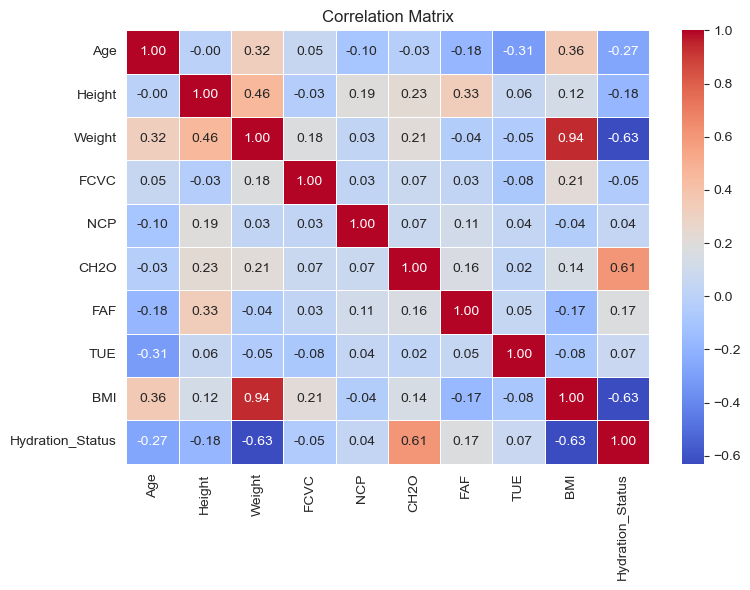

In [98]:
# Correlation Matrix of numerical features
cm = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [99]:
from sklearn.model_selection import train_test_split

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [100]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1565, 20)
X_test shape: (522, 20)
y_train shape: (1565,)
y_test shape: (522,)


In [101]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [102]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])

In [103]:
X_train.head()

Gender       Age    Height    Weight family_history_with_overweight  \
50    Female -0.513067 -0.963104 -1.317109                            yes   
1050    Male  0.692092  1.881288  0.590947                            yes   
1439  Female  1.947985 -1.862621 -0.114171                            yes   
2014  Female -0.989360  0.546661  1.525947                            yes   
958     Male -0.745541 -0.852608 -0.546265                             no   

     FAVC      FCVC       NCP       CAEC SMOKE      CH2O SCC       FAF  \
50    yes  1.017782  0.433610  Sometimes    no  1.448998  no -1.402375   
1050  yes  0.504707 -1.729979  Sometimes    no -1.660009  no  0.730712   
1439  yes -0.752421  0.433610  Sometimes    no -1.798496  no -1.402375   
2014  yes  1.017782  0.433610  Sometimes    no  1.282079  no  0.712322   
958   yes -0.374553 -1.729979         no    no  1.220995  no  0.197332   

           TUE       CALC                 MTRANS AgeGroup       BMI BMI Group  \
50    0.688398  Sometimes                Walking     Teen -1.102283     Obese   
1050 -1.001262  Sometimes  Public_Transportation     Teen -0.061417     Obese   
1439 -1.223771  Sometimes             Automobile    Adult  0.612166     Obese   
2014  0.377746  Sometimes  Public_Transportation     Teen  1.491956     Obese   
958   0.836099  Sometimes  Public_Transportation     Teen -0.278743     Obese   

      Hydration_Status  
50            2.605601  
1050         -1.458487  
1439         -1.260546  
2014         -0.341358  
958           1.603000

In [104]:
X_test.head()

Gender       Age    Height    Weight family_history_with_overweight  \
1612    Male  0.321752  1.067300  1.208575                            yes   
396   Female  1.947985 -1.635103 -1.067087                            yes   
1391  Female -0.078245 -0.963104 -0.001798                            yes   
1429    Male  1.947985  0.963920  0.643737                            yes   
1023    Male -0.078245  0.016469 -0.052814                            yes   

     FAVC      FCVC       NCP       CAEC SMOKE      CH2O SCC       FAF  \
1612  yes  0.160856  0.433610  Sometimes    no  1.390064  no  1.030860   
396    no  1.017782  0.433610  Sometimes    no -1.798496  no  1.133100   
1391  yes  0.955939 -1.729979  Sometimes    no  1.425513  no -0.124070   
1429  yes -0.316956 -1.729979  Sometimes    no  1.196336  no  1.387771   
1023  yes -0.752421 -0.322572  Sometimes    no -0.715705  no -0.832649   

           TUE        CALC                 MTRANS AgeGroup       BMI  \
1612 -0.960841   Sometimes  Public_Transportation     Teen  0.937644   
396   0.688398  Frequently             Automobile    Adult -0.550769   
1391  1.806945   Sometimes  Public_Transportation     Teen  0.376136   
1429 -0.462058   Sometimes             Automobile    Adult  0.346060   
1023  0.747081   Sometimes  Public_Transportation     Teen -0.067397   

     BMI Group  Hydration_Status  
1612     Obese         -0.033069  
396      Obese         -0.801699  
1391     Obese          1.163313  
1429     Obese          0.292266  
1023     Obese         -0.621015

In [105]:
cat_cols

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

**Categorical Features Encoding Strategy:**

- Binary Features: ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC' ]
  - They are encoded using Binary Mapping. Each category is mapped to 0 and 1.
- Ordinal Features: ['CAEC', 'CALC', 'AgeGroup', 'BMI Group'] 
  - handled using Ordinal Encoding\Mapping. 
  - The categories are mapped based on their natural progression.
- Nominal Features: ['MTRANS'] 
  - handle this using One-Hot Encoding.
- Target Column: ['NObeyesdad']
  - handle this using Label Encoding. 
  - Each class is assigned a unique integer value to enable compatibility with machine learning algorithms while preserving class distinction.

In [106]:
binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

binary_map = {"yes":1, "no":0, "Male":1, "Female":0}

for col in binary_cols:
    X_train[col] = X_train[col].map(binary_map)
    X_test[col]  = X_test[col].map(binary_map)

In [107]:
ordinal_order = {"no":0, "Sometimes":1, "Frequently":2, "Always":3}

for col in ['CAEC', 'CALC']:
    X_train[col] = X_train[col].map(ordinal_order)
    X_test[col]  = X_test[col].map(ordinal_order)

In [108]:
X_train = pd.get_dummies(X_train, columns=["MTRANS"], drop_first=True)
X_test  = pd.get_dummies(X_test, columns=["MTRANS"], drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [109]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

In [110]:
bool_cols = ['MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols]  = X_test[bool_cols].astype(int)

In [111]:
ordinal_cols = ['AgeGroup', 'BMI Group']
# Order 
age_order = ["Teen", "Adult", "Senior"]
bmi_order = ["Underweight", "Normal", "Overweight", "Obese"]

ordinal_encoder = OrdinalEncoder(categories=[age_order, bmi_order], handle_unknown='use_encoded_value', unknown_value=-1)
# fit
X_train[ordinal_cols] = ordinal_encoder.fit_transform(X_train[ordinal_cols])
X_test[ordinal_cols] = ordinal_encoder.transform(X_test[ordinal_cols])

In [112]:
X_train.head()

Gender       Age    Height    Weight  family_history_with_overweight  \
50         0 -0.513067 -0.963104 -1.317109                               1   
1050       1  0.692092  1.881288  0.590947                               1   
1439       0  1.947985 -1.862621 -0.114171                               1   
2014       0 -0.989360  0.546661  1.525947                               1   
958        1 -0.745541 -0.852608 -0.546265                               0   

      FAVC      FCVC       NCP  CAEC  SMOKE  ...       TUE  CALC  AgeGroup  \
50       1  1.017782  0.433610     1      0  ...  0.688398     1       0.0   
1050     1  0.504707 -1.729979     1      0  ... -1.001262     1       0.0   
1439     1 -0.752421  0.433610     1      0  ... -1.223771     1       1.0   
2014     1  1.017782  0.433610     1      0  ...  0.377746     1       0.0   
958      1 -0.374553 -1.729979     0      0  ...  0.836099     1       0.0   

           BMI  BMI Group  Hydration_Status  MTRANS_Bike  MTRANS_Motorbike  \
50   -1.102283        3.0          2.605601            0                 0   
1050 -0.061417        3.0         -1.458487            0                 0   
1439  0.612166        3.0         -1.260546            0                 0   
2014  1.491956        3.0         -0.341358            0                 0   
958  -0.278743        3.0          1.603000            0                 0   

      MTRANS_Public_Transportation  MTRANS_Walking  
50                               0               1  
1050                             1               0  
1439                             0               0  
2014                             1               0  
958                              1               0  

[5 rows x 23 columns]

# Models Building & Evaluation

  # Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [125]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=4000,
                             class_weight='balanced', random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],    
}

gs_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

gs_log_reg.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=4000,
                                          multi_class='multinomial',
                                          random_state=42, solver='saga'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [127]:
y_pred_lr = gs_log_reg.predict(X_test)

In [128]:
print("Best C:", gs_log_reg.best_params_)

Best C: {'C': 100}


In [129]:
accuracy = accuracy_score(y_test,y_pred_lr)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Model Accuracy: 95.40%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.95      0.90      0.93        70
           2       1.00      0.98      0.99        88
           3       0.97      1.00      0.99        74
           4       1.00      0.99      0.99        81
           5       0.88      0.88      0.88        69
           6       0.90      0.95      0.92        73

    accuracy                           0.95       522
   macro avg       0.95      0.95      0.95       522
weighted avg       0.95      0.95      0.95       522



In [130]:
# Logistic Regression Confusion Matrx

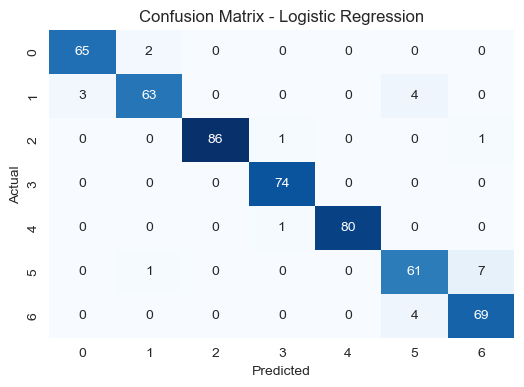

In [133]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

 # Decision Tree

In [134]:
dec_tree = DecisionTreeClassifier(max_depth=8, min_samples_split=5, min_samples_leaf=2,
                                  class_weight='balanced', random_state=42)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

In [135]:
y_pred_dt = dec_tree.predict(X_test)

In [136]:
accuracy = accuracy_score(y_test,y_pred_dt)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Model Accuracy: 96.36%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        67
           1       0.92      0.99      0.95        70
           2       1.00      0.95      0.98        88
           3       0.95      1.00      0.97        74
           4       1.00      0.99      0.99        81
           5       0.97      0.86      0.91        69
           6       0.91      0.99      0.95        73

    accuracy                           0.96       522
   macro avg       0.96      0.96      0.96       522
weighted avg       0.97      0.96      0.96       522



In [137]:
# Decision Tree Confusion Matrix

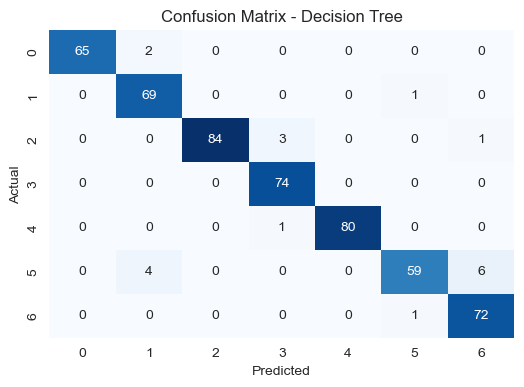

In [138]:
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()